In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('ggplot')
import seaborn as sns
from seaborn import pairplot

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics
import time

In [15]:
def cross_validation(mod,X, y,metric,k=5):
    
    cv_scores = cross_val_score(mod,X,y,cv=k,scoring = metric)
    if metric == "neg_mean_squared_error":
        print("Cross validated scores based on MSE:", abs(cv_scores))
    elif metric =="neg_mean_absolute_error":
        print("Cross validated scores based on MAE:", abs(cv_scores))

In [16]:
parkinson_path = 'parkinsons_updrs.data'
possum_path= 'possum.csv'
diamonds_path = 'diamonds.csv'

In [17]:
parkinsons  = pd.read_csv(parkinson_path)
possum = pd.read_csv(possum_path)
diamonds = pd.read_csv(diamonds_path)

In [18]:
X_parkinsons= parkinsons.drop(['motor_UPDRS','total_UPDRS'],axis=1)
y_parkinsons= parkinsons["total_UPDRS"]
x_train_parkinsons, x_test_parkinsons, y_train_parkinsons, y_test_parkinsons = train_test_split(X_parkinsons, y_parkinsons, test_size=0.2, random_state= 0)
# scale data
scaler = StandardScaler()
x_train_parkinsons_sc =  scaler.fit_transform(x_train_parkinsons)
x_test_parkinsons_sc =  scaler.fit_transform(x_test_parkinsons)

In [19]:
possum = possum.dropna()
possum['sex'].replace({'m':0, 'f':1}, inplace=True)
possum['Pop'].replace({'Vic':0, 'other':1, }, inplace=True)
#possum_norm=possum.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)
X_possum= possum.drop(possum.columns[[0,4]], axis=1) 
y_possum=possum["age"]
x_train_possum, x_test_possum, y_train_possum, y_test_possum = train_test_split(X_possum, y_possum, test_size=0.2, random_state= 0)
# scale data
scaler = StandardScaler()
x_train_possum_sc =  scaler.fit_transform(x_train_possum)
x_test_possum_sc =  scaler.fit_transform(x_test_possum)

In [20]:
diamonds['cut'].replace({'Fair':0, 'Good':1, '\'Very Good\'':2, 'Premium':3, 'Ideal':4}, inplace=True)
diamonds['color'].replace({'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6}, inplace=True)
diamonds['clarity'].replace({'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7}, inplace=True)
#diamonds_norm=diamonds.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)
X_diamonds= diamonds.drop(diamonds.columns[[6]], axis=1) 
y_diamonds=diamonds["price"]
x_train_diamonds, x_test_diamonds, y_train_diamonds, y_test_diamonds = train_test_split(X_diamonds, y_diamonds, test_size=0.2, random_state= 0)
# scale data
scaler = StandardScaler()
x_train_diamonds_sc =  scaler.fit_transform(x_train_diamonds)
x_test_diamonds_sc =  scaler.fit_transform(x_test_diamonds)

## Parkinson Random Forest

In [21]:
start_time = time.time()
clf_park = RandomForestRegressor(n_estimators=100,random_state=0)
clf_park.fit(x_train_parkinsons,y_train_parkinsons)
rf_prediction_park = clf_park.predict(x_test_parkinsons)
print("--- runtime ---" , (time.time() - start_time))
print("mean_squared_error: ", mean_squared_error(y_test_parkinsons, rf_prediction_park))
print("mean_absolute_error: ", mean_absolute_error(y_test_parkinsons,rf_prediction_park))
cross_validation(clf_park,x_train_parkinsons,y_train_parkinsons,"neg_mean_squared_error")
cross_validation(clf_park,x_train_parkinsons,y_train_parkinsons,"neg_mean_absolute_error")

--- runtime --- 3.5904009342193604
mean_squared_error:  0.1649789049632188
mean_absolute_error:  0.1722095165957452
Cross validated scores based on MSE: [0.34475662 0.19984113 0.28780431 0.32963557 0.26490172]
Cross validated scores based on MAE: [0.24044404 0.22365303 0.24690681 0.25227911 0.21841459]


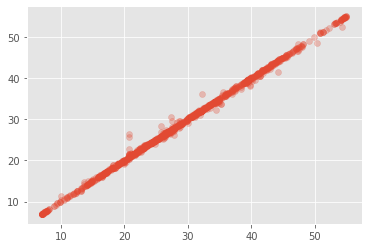

In [22]:
plt.scatter(y_test_parkinsons,rf_prediction_park,alpha=0.3)
plt.show()

## Parkinson Decision Tree

In [23]:
start_time = time.time()
clf = DecisionTreeRegressor(random_state=0) 
clf=clf.fit(x_train_parkinsons,y_train_parkinsons) 
dt_prediction_park = clf.predict(x_test_parkinsons) 
print("--- runtime ---" , (time.time() - start_time))
print("mean_squared_error: ", mean_squared_error(y_test_parkinsons, dt_prediction_park))
print("mean_absolute_error: ", mean_absolute_error(y_test_parkinsons,dt_prediction_park))
cross_validation(clf,x_train_parkinsons,y_train_parkinsons,"neg_mean_squared_error")
cross_validation(clf,x_train_parkinsons,y_train_parkinsons,"neg_mean_absolute_error")

--- runtime --- 0.06592130661010742
mean_squared_error:  0.5359204312510639
mean_absolute_error:  0.11443693617021294
Cross validated scores based on MSE: [1.46364897 0.65480218 0.6523715  1.99420868 1.54538795]
Cross validated scores based on MAE: [0.26552553 0.24739489 0.17006457 0.2424966  0.23096362]


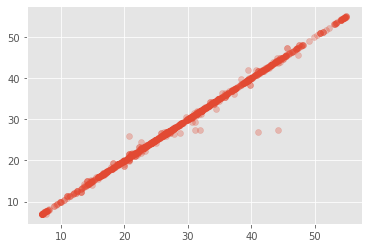

In [24]:
plt.scatter(y_test_parkinsons,dt_prediction_park,alpha=0.3)
plt.show()

## Possum Random Forest

In [25]:
start_time = time.time()
clf_poss = RandomForestRegressor(n_estimators=100,random_state=0)
clf_poss.fit(x_train_possum,y_train_possum)
rf_prediction_poss = clf_poss.predict(x_test_possum)
print("--- runtime ---" , (time.time() - start_time))
print("mean_squared_error: ", mean_squared_error(y_test_possum, rf_prediction_poss))
print("mean_absolute_error: ", mean_absolute_error(y_test_possum,rf_prediction_poss))
cross_validation(clf_poss,x_train_possum,y_train_possum,"neg_mean_squared_error")
cross_validation(clf_poss,x_train_possum,y_train_possum,"neg_mean_absolute_error")

--- runtime --- 0.11733174324035645
mean_squared_error:  3.6898857142857144
mean_absolute_error:  1.4438095238095239
Cross validated scores based on MSE: [3.089175   2.5589     4.7119375  2.60796875 2.06210625]
Cross validated scores based on MAE: [1.51625  1.27875  1.70625  1.289375 1.115625]


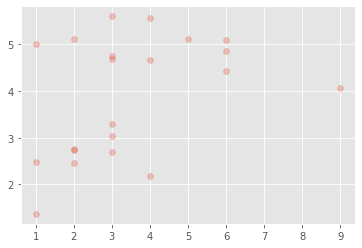

In [26]:
plt.scatter(y_test_possum,rf_prediction_poss,alpha=0.3)
plt.show()

## Possum Decision Tree

In [27]:
start_time = time.time()
clf = DecisionTreeRegressor(random_state=0) 
clf.fit(x_train_possum,y_train_possum)
dt_prediction_poss = clf.predict(x_test_possum)
print("--- runtime ---" , (time.time() - start_time))
print("mean_squared_error: ", mean_squared_error(y_test_possum, dt_prediction_poss))
print("mean_absolute_error: ", mean_absolute_error(y_test_possum,dt_prediction_poss))
cross_validation(clf,x_train_possum,y_train_possum,"neg_mean_squared_error")
cross_validation(clf,x_train_possum,y_train_possum,"neg_mean_absolute_error")

--- runtime --- 0.005612373352050781
mean_squared_error:  11.476190476190476
mean_absolute_error:  2.619047619047619
Cross validated scores based on MSE: [ 8.125   2.25   10.25    5.5625  5.4375]
Cross validated scores based on MAE: [2.25   1.125  2.5    1.8125 1.9375]


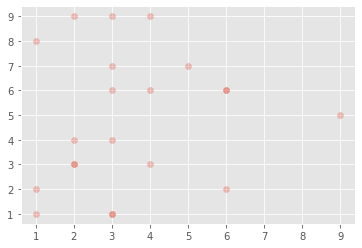

In [28]:
plt.scatter(y_test_possum,dt_prediction_poss,alpha=0.3)
plt.show()

## Diamonds Random Forest

In [29]:
start_time = time.time()
clf_diam = RandomForestRegressor(n_estimators=10,random_state=0)
clf_diam.fit(x_train_diamonds,y_train_diamonds)
rf_prediction_diam = clf_diam.predict(x_test_diamonds)
print("--- runtime ---" , (time.time() - start_time))
print("mean_squared_error: ", mean_squared_error(y_test_diamonds, rf_prediction_diam))
print("mean_absolute_error: ", mean_absolute_error(y_test_diamonds,rf_prediction_diam))
cross_validation(clf_diam,x_train_diamonds,y_train_diamonds,"neg_mean_squared_error")
cross_validation(clf_diam,x_train_diamonds,y_train_diamonds,"neg_mean_absolute_error")

--- runtime --- 1.3029417991638184
mean_squared_error:  312012.45299294306
mean_absolute_error:  274.91067910553176
Cross validated scores based on MSE: [332149.19363907 347611.16303805 329841.46322652 291461.60160975
 347768.50238467]
Cross validated scores based on MAE: [282.21050863 296.05713349 283.12993359 277.30304497 293.56340369]


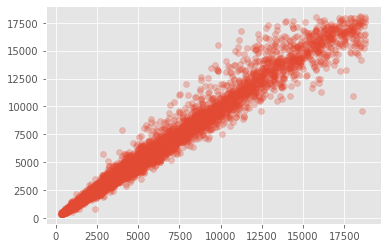

In [30]:
plt.scatter(y_test_diamonds,rf_prediction_diam,alpha=0.3)
plt.show()

## Diamonds Decision Tree

In [31]:
start_time = time.time()
clf = DecisionTreeRegressor(random_state=0) 
clf.fit(x_train_diamonds,y_train_diamonds)
dt_prediction_diam = clf.predict(x_test_diamonds)
print("--- runtime ---" , (time.time() - start_time))
print("mean_squared_error: ", mean_squared_error(y_test_diamonds, dt_prediction_diam))
print("mean_absolute_error: ", mean_absolute_error(y_test_diamonds,dt_prediction_diam))
cross_validation(clf,x_train_diamonds,y_train_diamonds,"neg_mean_squared_error")
cross_validation(clf,x_train_diamonds,y_train_diamonds,"neg_mean_absolute_error")

--- runtime --- 0.21454858779907227
mean_squared_error:  519362.33782906935
mean_absolute_error:  345.2550055617353
Cross validated scores based on MSE: [559238.18633414 579091.85720079 546929.86949594 531118.84536501
 610115.78977404]
Cross validated scores based on MAE: [360.43395899 369.3061059  358.50573581 362.14878331 379.18151796]


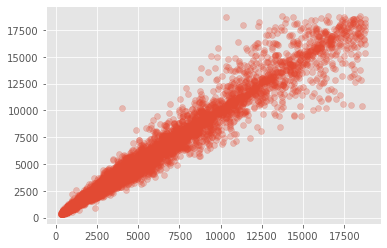

In [32]:
plt.scatter(y_test_diamonds,dt_prediction_diam,alpha=0.3)
plt.show()